###  SIMPLE LINEAR REGRESSION (advertising.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

#### getting data set

In [2]:
df = pd.read_csv('datasets/Advertising.csv', index_col = 0)
cols = df.columns[:-1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(X[:, 1])
#print(df)

#### splitting the data set into train and test (70/30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

#### training SLR model on training set

In [4]:
from sklearn.linear_model import LinearRegression


def trainModel(X, y, regressor):
#     print(type(X))
#     print(type(X[:,0]))
    B0 = {}
    Bi = {}
    for i in range(3):
        
        x = X[:,i].reshape(-1, 1)
        regressor.fit(x, y)
        B0[cols[i]] = regressor.intercept_
        Bi[cols[i]] = regressor.coef_
        print("intercept for {}: {}".format(cols[i], B0[cols[i]]))
        print("coefficient for {}: {}".format(cols[i], Bi[cols[i]]))
    return (B0, Bi)
    
    

In [5]:
regressor = LinearRegression()
B0, Bi = trainModel(X_train, y_train, regressor)



intercept for TV: 7.444192892244871
coefficient for TV: [0.04491568]
intercept for Radio: 9.802359581971574
coefficient for Radio: [0.16967444]
intercept for Newspaper: 13.08554021766472
coefficient for Newspaper: [0.02676558]


#### using model to predict against the test data set

In [6]:
est_y = {}
for i in range(3):
    x = X_test[:, i].reshape(-1, 1).round(2)
    est_y[cols[i]] = regressor.predict(x).round(2)
#print("{} : {}".format(est_y['TV'], y_test))

#### calculating accuracy using R^2

In [7]:
from sklearn.metrics import r2_score
r2_test = {}
r2_train = {}
for i in range(3):
    r2_train[cols[i]] = r2_score(y_train, regressor.predict(X_train[:, i].reshape(-1,1))).round(4)
    r2_test[cols[i]] = r2_score(y_test, est_y[cols[i]]).round(4)
print(r2_test)
print(r2_train)

{'TV': 0.2563, 'Radio': 0.0828, 'Newspaper': 0.0811}
{'TV': 0.1102, 'Radio': 0.0733, 'Newspaper': 0.012}


#### visualising train data set

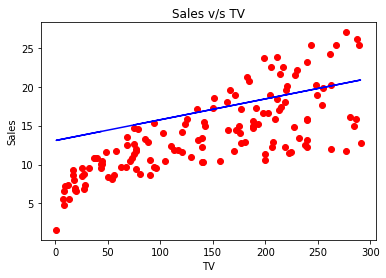

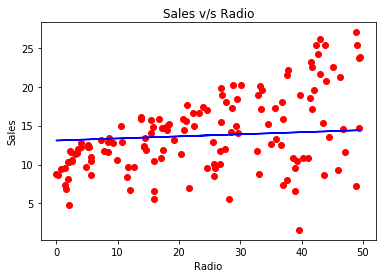

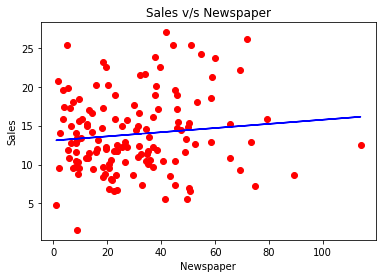

In [8]:
for i in range(3):
    plt.scatter(X_train[:,i] , y_train, color = 'red')
    plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
    plt.title('Sales v/s {}'.format(cols[i]))
    plt.xlabel('{}'.format(cols[i]))
    plt.ylabel("Sales")
    plt.show()

#### visualising test data set

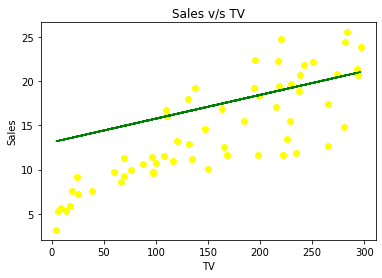

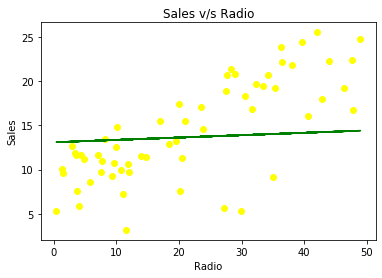

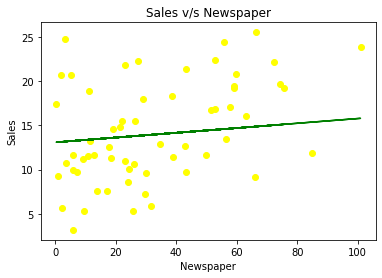

In [9]:
for i in range(3):
    plt.scatter(X_test[:,i] , y_test, color = 'yellow')
#    plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
    plt.plot(X_test[:, i], est_y[cols[i]], color='green')
    plt.title('Sales v/s {}'.format(cols[i]))
    plt.xlabel('{}'.format(cols[i]))
    plt.ylabel("Sales")
    plt.show()